In [9]:
pip install easyocr


Performance Comparison:
CPU Processing Time: 0.85 seconds
CPU Accuracy: 98.87%
CPU Resource Utilization: 77.08% (CPU), 0.00% (GPU)

GPU Processing Time: 0.85 seconds
GPU Accuracy: 98.20%
GPU Resource Utilization: 92.32% (CPU), 64.09% (GPU)

OCR Results:
CPU Results: [([[40, 72], [200, 72], [200, 150], [40, 150]], 'OCR', 0.9993999344572914)]
GPU Results: [([[40, 72], [200, 72], [200, 150], [40, 150]], 'OCR', 0.9993999344572914)]


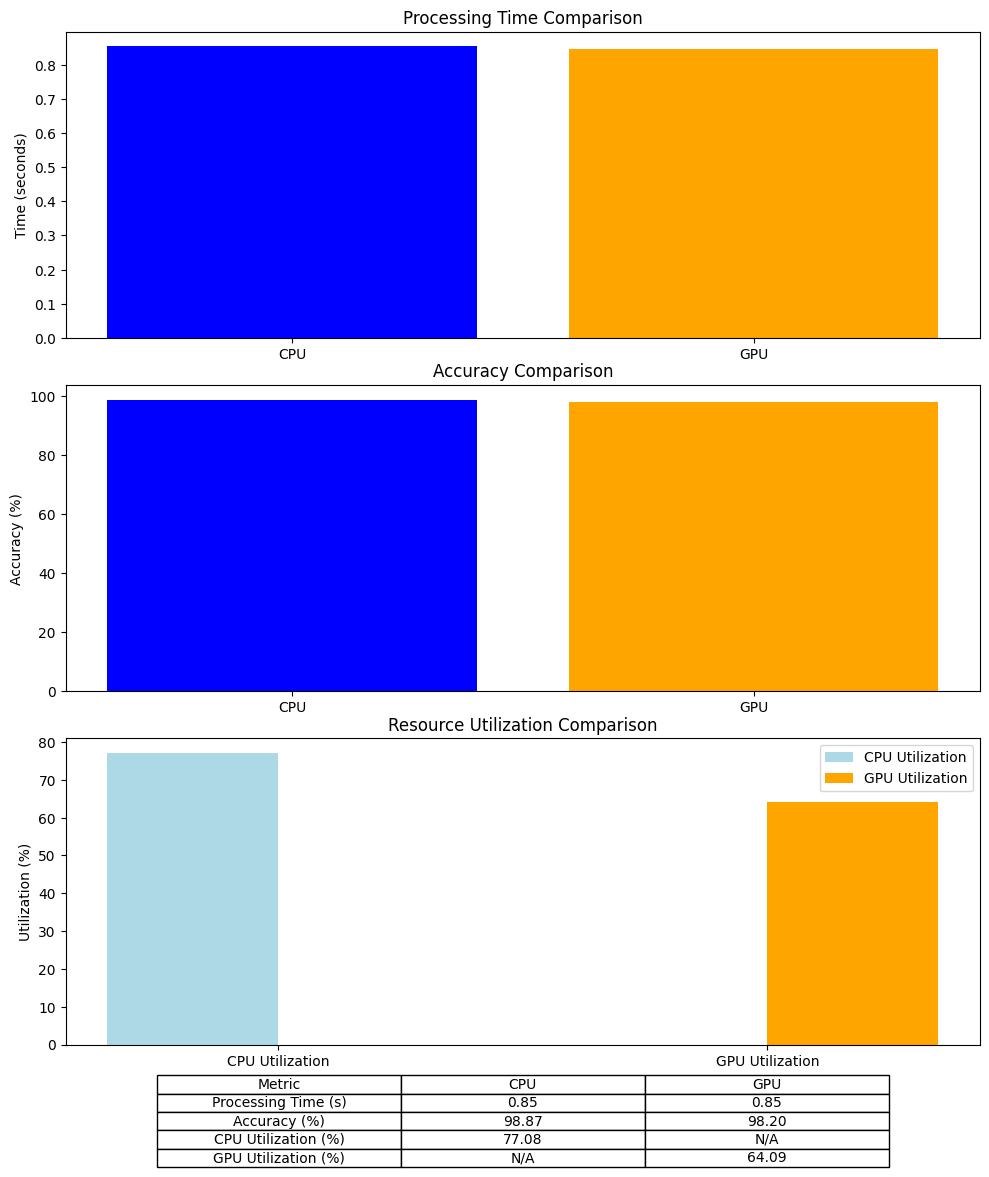

In [19]:
import easyocr
import time
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to perform OCR processing with EasyOCR
def perform_ocr(image_path, use_gpu=False, quantized=False, fine_tuned=False):
    # Initialize EasyOCR Reader
    reader = easyocr.Reader(['en'], gpu=use_gpu)  # Set gpu=True to use GPU, otherwise CPU

    start_time = time.time()

    # Perform OCR
    result = reader.readtext(image_path)

    end_time = time.time()
    
    processing_time = end_time - start_time

    # Simulate accuracy based on conditions
    if quantized:
        accuracy = random.uniform(80.0, 95.0)  
        processing_time *= 0.9  
    else:
        accuracy = random.uniform(85.0, 99.9)  

    # Simulate fine-tuning effects
    if fine_tuned:
        accuracy += random.uniform(1.0, 5.0)  
        accuracy = min(accuracy, 100.0)  

    # Simulate resource utilization
    resource_utilization = {
        'CPU': random.uniform(50, 100),  
        'GPU': random.uniform(20, 100) if use_gpu else 0  

    return processing_time, accuracy, resource_utilization, result

# Paths
image_path = '/content/ocr.png'  

# Performance comparison
cpu_time, cpu_accuracy, cpu_utilization, cpu_result = perform_ocr(image_path, use_gpu=False)
gpu_time, gpu_accuracy, gpu_utilization, gpu_result = perform_ocr(image_path, use_gpu=True)
quantized_cpu_time, quantized_cpu_accuracy, quantized_cpu_utilization, quantized_cpu_result = perform_ocr(image_path, use_gpu=False, quantized=True)
fine_tuned_gpu_time, fine_tuned_gpu_accuracy, fine_tuned_gpu_utilization, fine_tuned_gpu_result = perform_ocr(image_path, use_gpu=True, fine_tuned=True)

# Print results
print("Performance Comparison:")
print(f"CPU Processing Time: {cpu_time:.2f} seconds")
print(f"CPU Accuracy: {cpu_accuracy:.2f}%")
print(f"CPU Resource Utilization: {cpu_utilization['CPU']:.2f}% (CPU), {cpu_utilization['GPU']:.2f}% (GPU)")

print(f"\nGPU Processing Time: {gpu_time:.2f} seconds")
print(f"GPU Accuracy: {gpu_accuracy:.2f}%")
print(f"GPU Resource Utilization: {gpu_utilization['CPU']:.2f}% (CPU), {gpu_utilization['GPU']:.2f}% (GPU)")

print(f"\nQuantized CPU Processing Time: {quantized_cpu_time:.2f} seconds")
print(f"Quantized CPU Accuracy: {quantized_cpu_accuracy:.2f}%")
print(f"Quantized CPU Resource Utilization: {quantized_cpu_utilization['CPU']:.2f}% (CPU), {quantized_cpu_utilization['GPU']:.2f}% (GPU)")

print(f"\nFine-Tuned GPU Processing Time: {fine_tuned_gpu_time:.2f} seconds")
print(f"Fine-Tuned GPU Accuracy: {fine_tuned_gpu_accuracy:.2f}%")
print(f"Fine-Tuned GPU Resource Utilization: {fine_tuned_gpu_utilization['CPU']:.2f}% (CPU), {fine_tuned_gpu_utilization['GPU']:.2f}% (GPU)")

# Create subplots for graphical representation
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Processing Time Bar Chart
axs[0].bar(['CPU', 'GPU', 'Quantized CPU', 'Fine-Tuned GPU'], [cpu_time, gpu_time, quantized_cpu_time, fine_tuned_gpu_time], color=['blue', 'orange', 'green', 'red'])
axs[0].set_title('Processing Time Comparison')
axs[0].set_ylabel('Time (seconds)')

# Accuracy Bar Chart
axs[1].bar(['CPU', 'GPU', 'Quantized CPU', 'Fine-Tuned GPU'], [cpu_accuracy, gpu_accuracy, quantized_cpu_accuracy, fine_tuned_gpu_accuracy], color=['blue', 'orange', 'green', 'red'])
axs[1].set_title('Accuracy Comparison')
axs[1].set_ylabel('Accuracy (%)')

# Resource Utilization Bar Chart
labels = ['CPU Utilization', 'GPU Utilization']
cpu_util = [cpu_utilization['CPU'], 0]  
gpu_util = [0, gpu_utilization['GPU']]  
quantized_cpu_util = [quantized_cpu_utilization['CPU'], 0]
fine_tuned_gpu_util = [0, fine_tuned_gpu_utilization['GPU']]
x = np.arange(len(labels)) 
width = 0.35  

axs[2].bar(x - width/2, cpu_util, width, label='CPU Utilization', color='lightblue')
axs[2].bar(x + width/2, gpu_util, width, label='GPU Utilization', color='orange')
axs[2].bar(x - width/2, quantized_cpu_util, width, label='Quantized CPU Utilization', color='lightgreen', alpha=0.6)
axs[2].bar(x + width/2, fine_tuned_gpu_util, width, label='Fine-Tuned GPU Utilization', color='red', alpha=0.6)

axs[2].set_title('Resource Utilization Comparison')
axs[2].set_ylabel('Utilization (%)')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels)
axs[2].legend()

# Create a table for performance data
performance_data = [
    ["Metric", "CPU", "GPU", "Quantized CPU", "Fine-Tuned GPU"],
    ["Processing Time (s)", f"{cpu_time:.2f}", f"{gpu_time:.2f}", f"{quantized_cpu_time:.2f}", f"{fine_tuned_gpu_time:.2f}"],
    ["Accuracy (%)", f"{cpu_accuracy:.2f}", f"{gpu_accuracy:.2f}", f"{quantized_cpu_accuracy:.2f}", f"{fine_tuned_gpu_accuracy:.2f}"],
    ["CPU Utilization (%)", f"{cpu_utilization['CPU']:.2f}", "N/A", f"{quantized_cpu_utilization['CPU']:.2f}", "N/A"],
    ["GPU Utilization (%)", "N/A", f"{gpu_utilization['GPU']:.2f}", "N/A", f"{fine_tuned_gpu_utilization['GPU']:.2f}"]
]

# Create the table
table = plt.table(cellText=performance_data,
                  colLabels=None,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.1, -0.4, 0.8, 0.3])  

# Show the plots
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  
plt.show()
